In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
figure_folder = 'figures/'

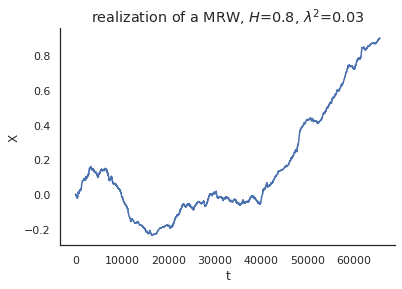

In [12]:
from pymultifracs.simul import mrw
import numpy as np

X = mrw(shape=65536, H=0.8, lam=np.sqrt(0.03), L=65536)

plt.plot(X)
plt.title(r'realization of a MRW, $H$=0.8, $\lambda^2$=0.03', size='large')
plt.ylabel('X')
plt.xlabel('t')
sns.despine()
plt.show()

In [13]:
rng = np.random.default_rng()

In [145]:
null_distribution = np.array([rng.permutation(X) for i in range(1)]).transpose()

In [146]:
from pymultifracs.wavelet import wavelet_analysis

In [147]:
WT = wavelet_analysis(null_distribution, p_exp=2, j1=2, j2=12, weighted=True, gamint=1)

In [148]:
coef_boot = WT.wt_coefs.bootstrap(100, 'db3')

Using coef bootstrapping technique


In [149]:
leader_boot = WT.wt_leaders.bootstrap(100, 'db3')

Using leader bootstrapping technique


In [150]:
from pymultifracs.estimation import estimate_hmin

In [151]:
hmin = estimate_hmin(WT.wt_coefs, j1=2, j2_eff=12, weighted=True)

In [152]:
from pymultifracs.mfa import minimal_mf_analysis

In [153]:
dwt, lwt = minimal_mf_analysis(WT.wt_coefs, WT.wt_leaders, j1=2, weighted=True, q=None, n_cumul=3)
dwt_b, lwt_b = minimal_mf_analysis(coef_boot, leader_boot, j1=2, weighted=True, q=None, n_cumul=3)

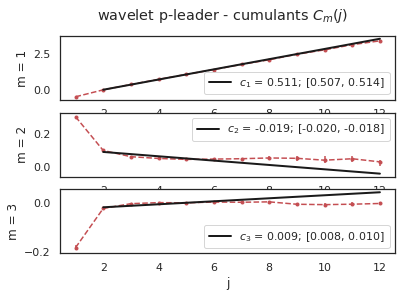

In [154]:
lwt.cumulants.plot(cm_boot=lwt_b.cumulants)

In [81]:
dwt.structure.CI_H

array([-0.50749695, -0.49319222])

In [82]:
lwt.cumulants.CI_c2

array([-0.02243637, -0.01901144])

In [84]:
lwt.cumulants.c2.mean()

-0.0206548334359564

In [122]:
WT_true = wavelet_analysis(X, p_exp=2, j1=2, j2=12, weighted=True, gamint=1)

In [123]:
hmin = estimate_hmin(WT_true.wt_coefs, j1=2, j2_eff=12, weighted=True)

In [124]:
dwt, lwt = minimal_mf_analysis(WT_true.wt_coefs, WT_true.wt_leaders, j1=2, weighted=True, q=None, n_cumul=3)

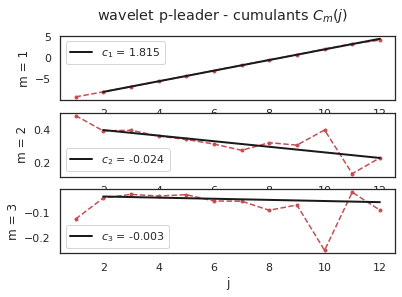

In [125]:
lwt.cumulants.plot()

In [76]:
dwt.structure.H

array([0.79464449])

In [77]:
lwt.cumulants.c2

array(-0.02418056)

In [78]:
WT_one = wavelet_analysis(null_distribution[:, 0], p_exp=2, j1=2, j2=12, weighted=True, gamint=1)

In [68]:
hmin = estimate_hmin(WT_true.wt_coefs, j1=2, j2_eff=12, weighted=True)

In [69]:
dwt, lwt = minimal_mf_analysis(WT_true.wt_coefs, WT_true.wt_leaders, j1=2, weighted=True, q=None, n_cumul=3)

In [70]:
dwt.structure.H

array([0.79464449])

In [71]:
lwt.cumulants.c2

array(-0.02691356)